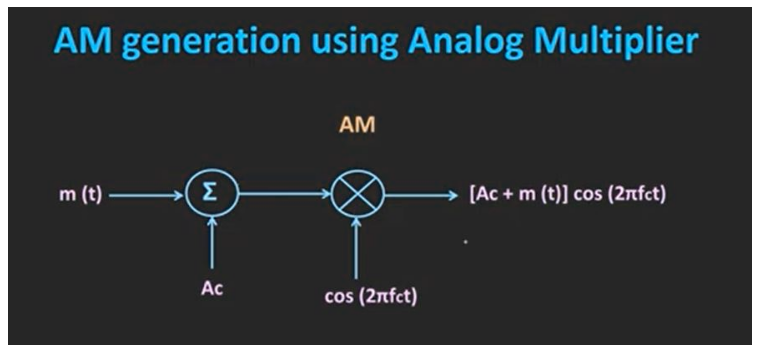

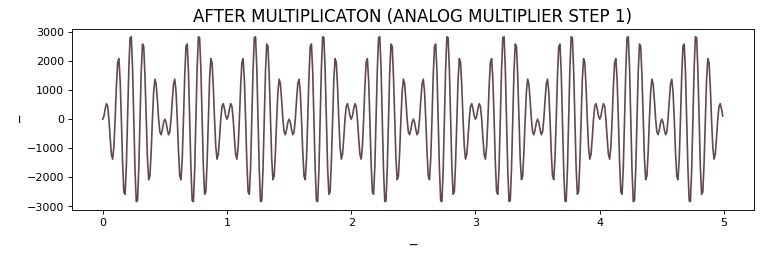

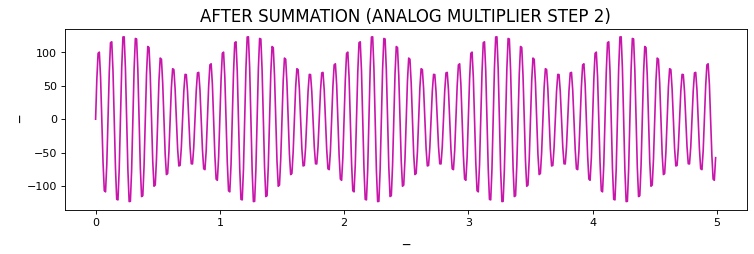

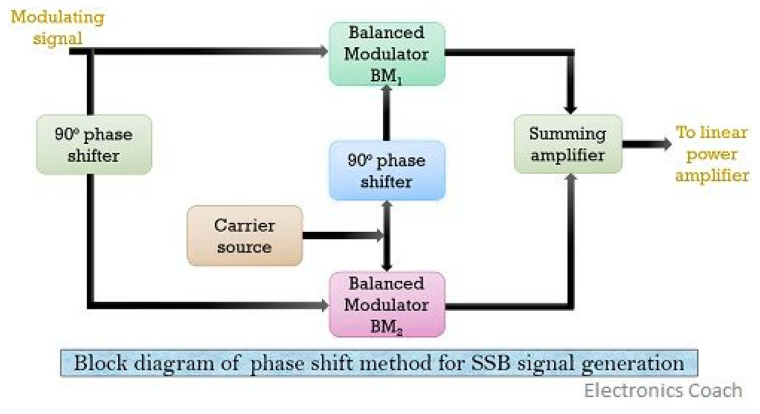

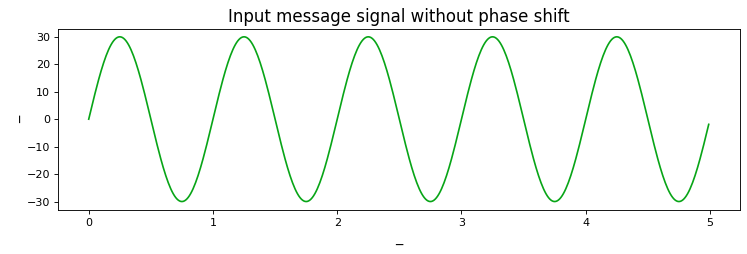

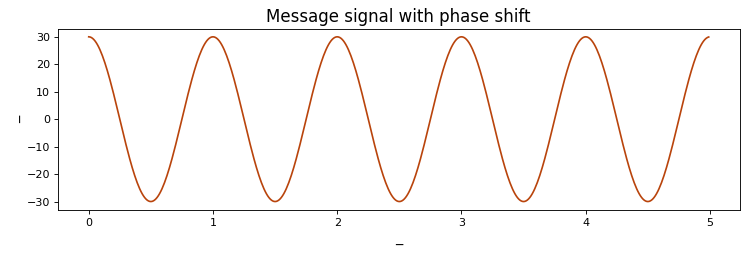

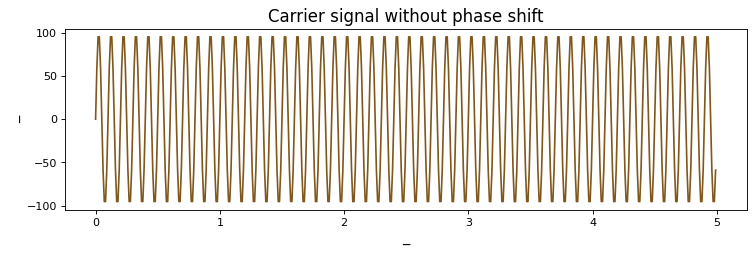

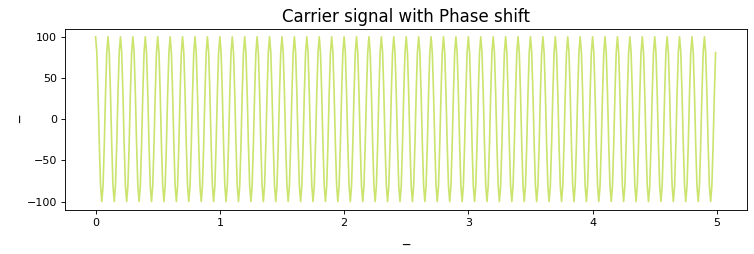

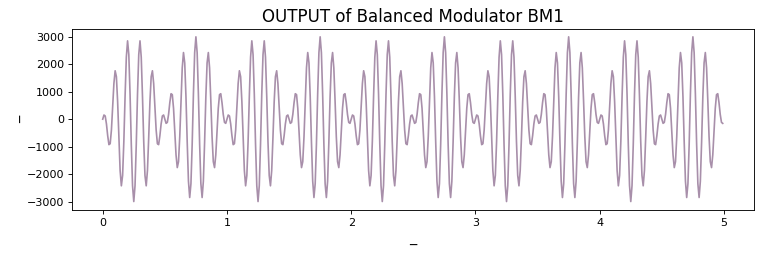

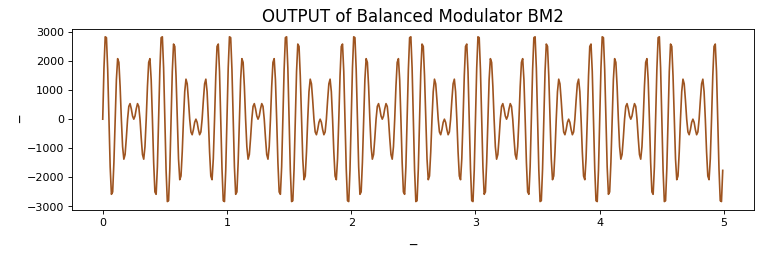

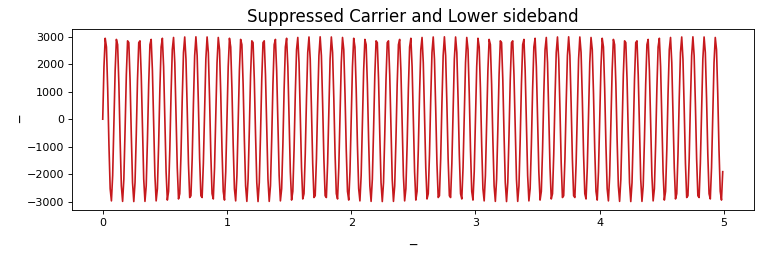

In [48]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cv2
import scipy.integrate
from scipy.signal import hilbert
# Amplitude_Modulation_class
class Amplitude_Modulation:
    def __init__(self,message_angular_freq=1,carrier_angular_freq=10,
                 message_amplitude=30,carrier_amplitude=100,
                 time_start=0,time_end=5,
                 message_phase=0,carrier_phase=0,
                 message_signal="sin",carrier_signal="sin",samplingFrequency=100):

        self.message_angular_freq=message_angular_freq
        self.carrier_angular_freq=carrier_angular_freq

        self.message_amplitude=message_amplitude
        self.carrier_amplitude=carrier_amplitude

        self.samplingFrequency=samplingFrequency

        self.time_start=time_start
        self.time_end=time_end
        self.time=np.arange(self.time_start,self.time_end,1/samplingFrequency)
        
        self.message_phase=message_phase
        self.carrier_phase=carrier_phase

        #creating message_signal
        if message_signal=="sin":

            self.message_signal=self.message_amplitude*np.sin((2*np.pi*self.message_angular_freq*self.time)+self.message_phase)

        elif message_signal=="cos":

            self.message_signal=self.message_amplitude*np.cos(2*np.pi*self.message_angular_freq*self.time+self.message_phase)
            
        elif message_signal=="tan":
            
            self.message_signal=self.message_amplitude*np.tan(2*np.pi*self.message_angular_freq*self.time+self.message_phase)

        else:

            print("INVALID MESSAGE SIGNAL *****ERROR*******")

            return

        #Creating carrier_signal
        if carrier_signal=="sin":
            
            self.carrier_signal=self.carrier_amplitude*np.sin(2*np.pi*self.carrier_angular_freq*self.time+self.carrier_phase)
            
        elif message_signal=="cos":
            
            self.carrier_signal=self.carrier_amplitude*np.cos(2*np.pi*self.carrier_angular_freq*self.time+self.carrier_phase)
            
        else:
            
            print("INVALID CARRIER SIGNAL *******ERROR******")
            
            return

        #Creating Amplitude modulated signal
        self.modulated_signal=None
        
    def get_modulated_signal(self):    
        
        return self.modulated_signal
    
    def get_carrier_signal(self):
        
        return self.carrier_signal
    
    def get_message_signal(self):
        
        return self.message_signal
    
    def get_time(self):
        
        return self.time
    
    def analog_multiplier(self):
#         image = cv2.imread(r'C:\Users\Uday sonu\Desktop\ACS_Minor_project\images\AM_analog_multiplier.jpg')
        image=cv2.imread(r"./images/AM_analog_multiplier.jpg")
        figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
        plt.axis("off")
        plt.imshow(image)
        plt.show()
        # message_signal is multiplied with carrier signal and
        # this output is added to the carrier signal hence we generated 
        # Amplitude modulated signal with analog multiplier method
        
        message_signal_X_carrier_siganl=self.carrier_signal*self.message_signal
        
        self.plot(self.time,message_signal_X_carrier_siganl,title="AFTER MULTIPLICATON (ANALOG MULTIPLIER STEP 1)")
        
        self.modulated_signal=self.carrier_signal+(1/self.carrier_amplitude)*message_signal_X_carrier_siganl
        
        self.plot(self.time,self.modulated_signal,title="AFTER SUMMATION (ANALOG MULTIPLIER STEP 2)")
        
    def square_law_modulator(self,a=1,b=0.5,c=0.1,d=0.01):
        
        
        image=cv2.imread(r"./images/AM_square_law_modulator.jpg")
        figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
        plt.axis("off")
        plt.imshow(image)
        plt.show()
        
        #message signal and carrier signal are added
        Vin=self.message_signal+self.carrier_signal
        
        self.plot(self.time,Vin,title="AFTER SUMMATION OF MESSAGE AND CARRIER SIGNAL --(SQUARE LAW MODULATOR STEP 1)")
              
        ## after Vin passed through Non_linear Device
        ## here after passing through non linear device ouput looks like
        ## a*(m+c)^2+b*(m+c)^3+c*(m+c)^4........
        ## this contains so many range of frequencies since there are
        ## m*m , c*c , m*c 
        Vo=a*Vin+b*(Vin)*(Vin)+c*Vin*Vin*Vin+d*Vin*Vin*Vin*Vin
        
        
        self.plot(self.time,Vo,title="AFTER PASSING THROUGH NON LINEAR DEVICE(DIODE) --(SQUARE LAW MODULATOR STEP 2)")

        ## now passing Vo through band pass filter
        ## we filter out the frequencies which are not needed using Band Pass Filter
        
        Vo= a*self.carrier_signal*(1+(2*b/a)/(self.carrier_amplitude)*self.message_signal)
        
        self.modulated_signal=Vo
        
        self.plot(self.time,Vo,title="AFTER PASSING THROUGH BAND PASS FILTER --(SQUARE LAW MODULATOR STEP 3)")
        
    def plot(self,x_value,y_value,title="TITLE",x_value_2=None,y_value_2=None,
             x_label="_",y_label="_"):
        
        figure(num=None, figsize=(11, 3), dpi=80, facecolor='w', edgecolor='k')
        
        if x_value_2==None and y_value_2==None:
            
            plt.plot(x_value,y_value,c=np.random.rand(3,))
            
            plt.title(title,size=15)
            
            plt.xlabel(x_label,size=13)
            
            plt.ylabel(y_label,size=13)
            
            plt.show()
        else:
            plt.plot(x_value,y_value,color="pink")
            
            plt.plot(x_value_2,y_value_2,color="b")
            
            plt.show()
            
    #funcion to perform the fourier of the given signal
    def fourier_trainsfrom(self,signal):
        amplitude=signal
        # Frequency domain representation
        samplingFrequency=self.samplingFrequency
        
        fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

        fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

        tpCount     = len(amplitude)

        values      = np.arange(int(tpCount/2))

        timePeriod  = tpCount/samplingFrequency

        frequencies = values/timePeriod

        # Frequency domain representation

        self.plot(frequencies, abs(fourierTransform),title="Frequency Domain Representation")

    def dsbsc(self):
        return self.carrier_signal*self.message_signal/(self.carrier_amplitude)
    
    def ssbsc_lower(self):
        return self.message_amplitude*np.sin(2*np.pi*self.carrier_angular_freq*self.time-2*(np.pi)
                      *self.message_angular_freq*self.time)

    def ssbsc_upper(self):
        return self.message_amplitude*np.sin(2*np.pi*self.carrier_angular_freq*self.time+2*(np.pi)
                      *self.message_angular_freq*self.time)
    
    def phase_shift_method(self,angle_oscillator=np.pi/2,angle_message=np.pi/2,upper=True):
        
        image=cv2.imread(r"./images/AM_phase_shift_method.jpg")
        figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
        plt.axis("off")
        plt.imshow(image)
        plt.show()
        
        #plotting input message signal()
        message_without_90=self.message_amplitude*np.sin((2*np.pi*self.message_angular_freq*self.time)+self.message_phase)
        self.plot(self.get_time(),message_without_90,title="Input message signal without phase shift")
        
        
        #plotting input message signal after phase shift
        message_with_90=self.message_amplitude*np.sin((2*np.pi*self.message_angular_freq*self.time)+angle_message)
        self.plot(self.get_time(),message_with_90,title="Message signal with phase shift")
        
        
        #carrier generated by oscillator
        carrier_without_90= self.carrier_signal=self.carrier_amplitude*np.sin(2*np.pi*self.carrier_angular_freq*self.time+self.carrier_phase)
        self.plot(self.get_time(),carrier_without_90,title="Carrier signal without phase shift")
        
        #carrier with 90 degree phase shift
        carrier_with_90=self.carrier_signal=self.carrier_amplitude*np.sin(2*np.pi*self.carrier_angular_freq*self.time+angle_oscillator)
        self.plot(self.get_time(),carrier_with_90,title="Carrier signal with Phase shift")
        
        
        # OUTPUT of balance modulator BM1
        product_mod_m1=message_without_90*carrier_with_90
        self.plot(self.get_time(),product_mod_m1,title="OUTPUT of Balanced Modulator BM1")
        
        #OUTPUT of balance modulator BM2
        product_mod_m2=message_with_90*carrier_without_90
        self.plot(self.get_time(),product_mod_m2,title="OUTPUT of Balanced Modulator BM2")
        
        adder1=product_mod_m1-product_mod_m2
        adder2=product_mod_m1+product_mod_m2
        if upper==True:
            self.plot(self.get_time(),adder2,title="Suppressed Carrier and Lower sideband")
            return adder2
        else:
            self.plot(self.get_time(),adder1,title="Suppressed Carrier and Upper sideband")
            return adder1
        ac.fourier_trainsfrom(adder)

#         self.plot(self.get_time(),adder,title="helo")

ac=Amplitude_Modulation(message_signal='sin')
# ac.fourier_trainsfrom(ac.phase_shift_method())
# ac.plot(ac.get_time(),ac.analog_multiplier())
# ac.fourier_trainsfrom(ac.analog_multiplier())
ac.analog_multiplier()
k=ac.phase_shift_method(angle_oscillator=np.pi/2)

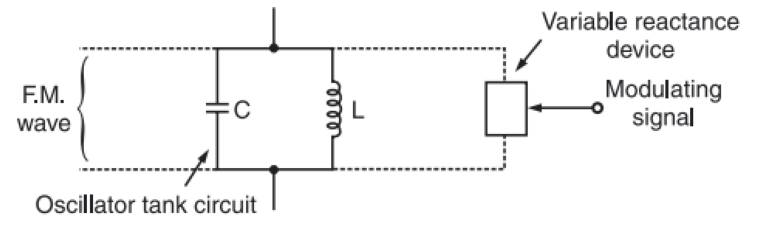

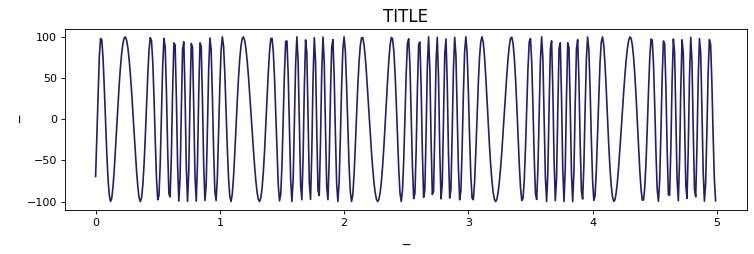

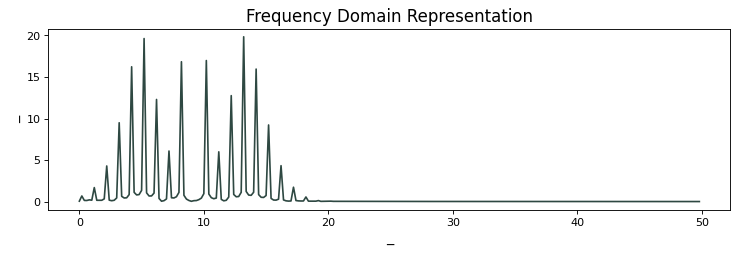

In [71]:
class Frequency_Modulation:
        def __init__(self,message_angular_freq=1,carrier_angular_freq=10,
            message_amplitude=20,carrier_amplitude=100,
            time_start=0,time_end=3,
            message_phase=0,carrier_phase=0,
            message_signal="sin",carrier_signal="sin",samplingFrequency=100,kf=0.3):

            self.message_angular_freq=message_angular_freq
            self.carrier_angular_freq=carrier_angular_freq

            self.message_amplitude=message_amplitude
            self.carrier_amplitude=carrier_amplitude

            self.samplingFrequency=samplingFrequency

            self.time_start=time_start
            self.time_end=time_end
            self.time=np.arange(self.time_start,self.time_end,1/samplingFrequency)

            self.message_phase=message_phase
            self.carrier_phase=carrier_phase

                    #creating message_signal
            if message_signal=="cos":

                self.message_signal=self.message_amplitude*np.sin((2*np.pi*self.message_angular_freq*self.time)+self.message_phase)

            elif message_signal=="sin":

                self.message_signal=self.message_amplitude*np.cos(2*np.pi*self.message_angular_freq*self.time+self.message_phase)

            elif message_signal=="tan":

                self.message_signal=self.message_amplitude*np.tan(2*np.pi*self.message_angular_freq*self.time+self.message_phase)

            else:

                print("INVALID MESSAGE SIGNAL *****ERROR*******       ")

                return

                    #Creating carrier_signal
            if carrier_signal=="sin":

                self.carrier_signal=self.carrier_amplitude*np.sin(2*np.pi*self.carrier_angular_freq*self.time+self.carrier_phase+kf*self.message_signal/(2*np.pi*self.message_angular_freq))

            elif carrier_signal=="cos":

                self.carrier_signal=self.carrier_amplitude*np.cos(2*np.pi*self.carrier_angular_freq*self.time+self.carrier_phase+kf*self.message_signal/(2*np.pi*self.message_angular_freq))

            else:

                print("INVALID CARRIER SIGNAL *******ERROR******")

                return

                    #Creating Amplitude modulated signal
            self.modulated_signal=self.carrier_signal
        def plot(self,x_value,y_value,title="TITLE",x_value_2=None,y_value_2=None,
            x_label="_",y_label="_"):
        
            figure(num=None, figsize=(11, 3), dpi=80, facecolor='w', edgecolor='k')

            if x_value_2==None and y_value_2==None:

                plt.plot(x_value,y_value,c=np.random.rand(3,))

                plt.title(title,size=15)

                plt.xlabel(x_label,size=13)

                plt.ylabel(y_label,size=13)

                plt.show()
            else:
                plt.plot(x_value,y_value,color="pink")

                plt.plot(x_value_2,y_value_2,color="b")

                plt.show()

        def get_modulated_signal(self):    

            return self.modulated_signal

        def get_carrier_signal(self):

            return self.carrier_signal

        def get_message_signal(self):

            return self.message_signal

        def get_time(self):

            return self.time
        
        def direct_method(self,L=0.1,C=0.003,k=0.00018,carrier_signal="sin"):
            image=cv2.imread(r"./images/fm_reactance_modulator.png")
            figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
            plt.axis("off")
            plt.imshow(image)
            plt.show()
            carrier_angular_freq=1/np.sqrt(L*C)
            kf=(k*carrier_angular_freq)/(2*C)
#             print(kf)
            if carrier_signal=="sin":
                carrier_signal=self.carrier_amplitude*np.sin(carrier_angular_freq*self.time+self.carrier_phase+kf*self.message_signal/(2*np.pi*self.message_angular_freq))
            elif carrier_signal=="cos":
                carrier_signal=self.carrier_amplitude*np.cos(carrier_angular_freq*self.time+self.carrier_phase+kf*self.message_signal/(2*np.pi*self.message_angular_freq))
            else:
                print("INVALID CARRIER SIGNAL *******ERROR******")
                return
            self.plot(self.get_time(),carrier_signal)
            return carrier_signal
        
        def indirect_method(self,crystal_oscillator="sin"):
                pass
            
            
            
            
        def fourier_trainsfrom(self,signal):
            amplitude=signal
            # Frequency domain representation
            samplingFrequency=self.samplingFrequency

            fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

            fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

            tpCount     = len(amplitude)

            values      = np.arange(int(tpCount/2))

            timePeriod  = tpCount/samplingFrequency

            frequencies = values/timePeriod

            # Frequency domain representation

            self.plot(frequencies, abs(fourierTransform),title="Frequency Domain Representation")

fc=Frequency_Modulation(message_signal="sin",carrier_signal="cos",time_end=5,kf=2)
# fc.plot(fc.get_time(),fc.modulated_signal)
# fc=Frequency_Modulation(message_signal="cos",carrier_signal="cos",time_end=5,kf=0.3)
# fc.plot(fc.get_time(),fc.modulated_signal)
# fc=Frequency_Modulation(message_signal="sin",carrier_signal="sin",time_end=5,kf=0.3)
# fc.plot(fc.get_time(),fc.modulated_signal)
# fc=Frequency_Modulation(message_signal="cos",carrier_signal="sin",time_end=5,kf=0.3)
# fc.plot(fc.get_time(),fc.modulated_signal)
# fc.plot(fc.get_time(),fc.direct_method())
fc.fourier_trainsfrom(fc.direct_method())

In [79]:
class demodulation:
    

TypeError: 'float' object cannot be interpreted as an integer

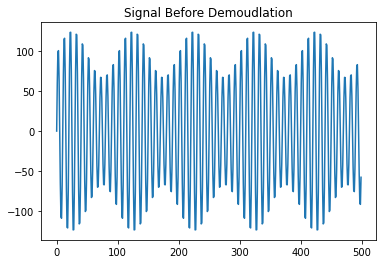

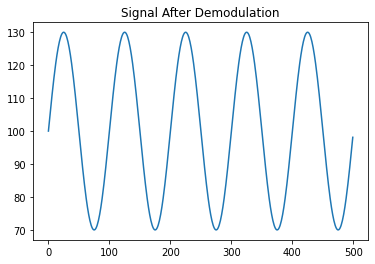

In [49]:
class AM_Demodulation:
    def __init__(self):
        pass
    def demod(self,signal):
        x=signal
        plt.plot(x)
        plt.title("Signal Before Demoudlation")
        plt.show()
        h=abs(hilbert(x))  
        plt.plot(h)
        plt.title("Signal After Demodulation")
        plt.show()

amd=AM_Demodulation()
amd.demod(ac.modulated_signal)

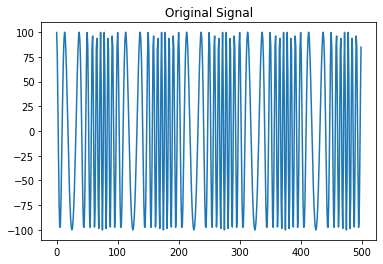

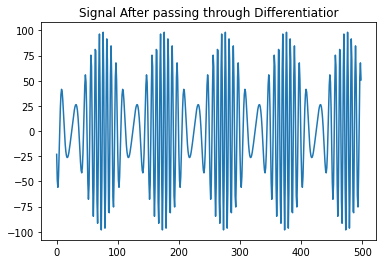

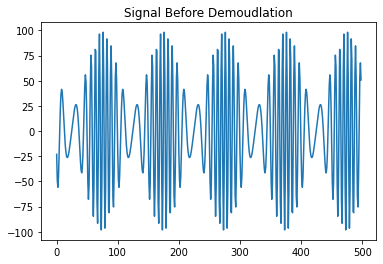

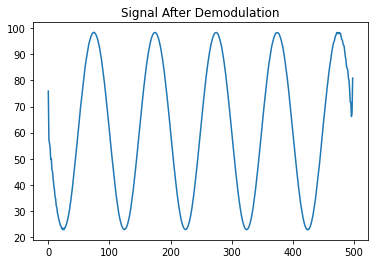

In [78]:
class FM_demod:
    def __init__(self):
        pass
    def envolope_detector(self,signal):
        x=signal
        plt.plot(x)
        plt.title("Signal Before Demoudlation")
        plt.show()
        h=abs(hilbert(x))  
        plt.plot(h)
        plt.title("Signal After Demodulation")
        plt.show()
    def demod(self,signal):
        x=signal
        plt.plot(x)
        plt.title("Original Signal")
        plt.show()
        x=np.diff(x)
        plt.plot(x)
        # x=np.abs(x)
        plt.title("Signal After passing through Differentiatior")
        plt.show()
        self.envolope_detector(x)
fmd=FM_demod()
fmd.demod(fc.modulated_signal)

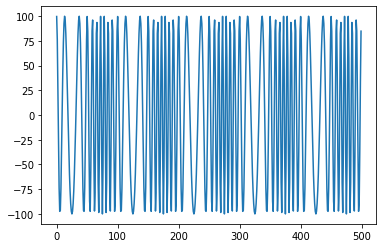

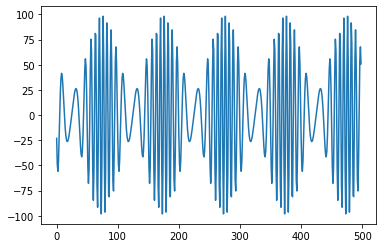

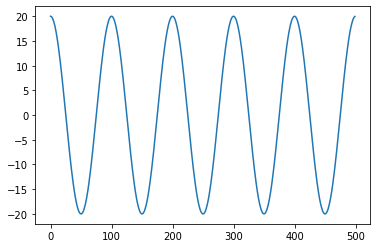

In [74]:
x=fc.modulated_signal
plt.plot(x)
plt.show()
x=np.diff(x)
# amd.demod(x)
plt.plot(x)
plt.show()
plt.plot(fc.message_signal)